<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/Project-cu-i-k-/blob/main/Projectcuoiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pandas as pd
#Lấy các model, các hàm tối ưu 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
#Load các lệnh xử lí ảnh 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Link Train 
train_path = '/content/drive/MyDrive/loai3'

In [ ]:
#Ket noi voi google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train = ImageDataGenerator(rescale=1/255,shear_range=0.3,
                           horizontal_flip=True,vertical_flip=False,zoom_range=0.3)
train_dataset = train.flow_from_directory(train_path,target_size=(150,150),batch_size=8,
                                          color_mode="grayscale",class_mode="categorical")

Found 480 images belonging to 6 classes.


In [ ]:
train_dataset.class_indices

{'HongDiem': 0,
 'ManhTruong': 1,
 'QuocTruong': 2,
 'TranThanh': 3,
 'TruongGiang': 4,
 'VietAnh': 5}

In [ ]:
#Thiet Lap Model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                      

In [ ]:
#Complie Model 
model.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training Model 
history = model.fit(train_dataset,epochs = 70,batch_size=32)

Epoch 1/70
60/60 [==============================] - 3s 49ms/step - loss: 2.0413 - accuracy: 0.1937
Epoch 2/70
60/60 [==============================] - 3s 53ms/step - loss: 1.7737 - accuracy: 0.2313
Epoch 3/70
60/60 [==============================] - 4s 58ms/step - loss: 1.7654 - accuracy: 0.2479
Epoch 4/70
60/60 [==============================] - 3s 49ms/step - loss: 1.7391 - accuracy: 0.2833
Epoch 5/70
60/60 [==============================] - 3s 49ms/step - loss: 1.6991 - accuracy: 0.3104
Epoch 6/70
60/60 [==============================] - 3s 49ms/step - loss: 1.6711 - accuracy: 0.3229
Epoch 7/70
60/60 [==============================] - 3s 48ms/step - loss: 1.6211 - accuracy: 0.3500
Epoch 8/70
60/60 [==============================] - 3s 48ms/step - loss: 1.4962 - accuracy: 0.3875
Epoch 9/70
60/60 [==============================] - 3s 50ms/step - loss: 1.4392 - accuracy: 0.4375
Epoch 10/70
60/60 [==============================] - 3s 50ms/step - loss: 1.3905 - accuracy: 0.4771
Epoch 11/

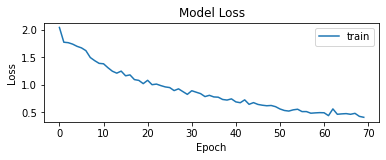

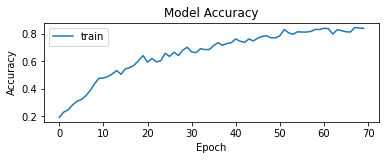

In [ ]:
#Vẽ đồ thị loss 
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Vẽ đồ thị Accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [ ]:
label = ['Hồng Diễm','Mạnh Trường','Quốc Trường','Trấn Thành','Trường Giang','Việt Anh']


In [ ]:
model.save('Projectk.h5')

1
[[2.5614752e-05 9.7010684e-01 1.0622210e-03 1.5849378e-03 2.4453690e-04
  2.6975889e-02]]
Tỉ lệ giống với diễn viên Mạnh Trườnglà 97.0106840133667 %


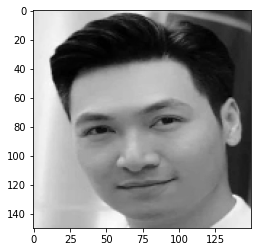

In [ ]:
#Load ảnh 
img = cv2.imread('42.jpg')
img = cv2.resize(img,(150,150)) #chỉnh kích thước  ảnh về 150x150 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # chuyển ảnh về đen trắng 
plt.imshow(img,'gray') # Hiển thị ảnh 
#Chuyển ảnh về mảng 
img = img_to_array(img)
img = img.reshape(1,150,150,1) # đưa ảnh về hình dạng mới cho một mảng mà không thay đổi dữ liệu của nó.
img = img.astype('float32') #thay đổi kiểu dữ liệu
img = img/255 #chuẩn hóa dữ liệu thành 0 và  1 
dudoan = model.predict(img)
print(np.argmax(dudoan))
print(dudoan)
print('Tỉ lệ giống với diễn viên '+ label[np.argmax(dudoan)]+ 'là' ,np.max(dudoan)*100 , '%')